In [46]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Load the dataset
data = pd.read_csv('OrdersandDeliveries.csv')

#Print first few rows and shape of the dataset
print(data.head())
print(data.shape)

       Country           Customer Name  Delivery Year  Engine Model Series  \
0  Afghanistan  Ariana Afghan Airlines          1968.0     PW          727   
1  Afghanistan  Ariana Afghan Airlines          1970.0     PW          727   
2  Afghanistan  Ariana Afghan Airlines          1979.0     GE        DC-10   
3  Afghanistan  Ariana Afghan Airlines             NaN     CF      737-700   
4      Algeria             Air Algerie          1974.0     PW          727   

  Order Month  Order Year        Region Delivery Total Order Total  \
0         Mar      1968.0  Central Asia              1           1   
1         Apr      1969.0  Central Asia              1           1   
2         Sep      1978.0  Central Asia              1           1   
3         Nov      2005.0  Central Asia              0           4   
4         Jan      1974.0        Africa              1           1   

  Unfilled Orders  
0             NaN  
1             NaN  
2             NaN  
3             NaN  
4         

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9073 entries, 0 to 9072
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          9072 non-null   object 
 1   Customer Name    9072 non-null   object 
 2   Delivery Year    8047 non-null   float64
 3   Engine           9072 non-null   object 
 4   Model Series     9072 non-null   object 
 5   Order Month      9072 non-null   object 
 6   Order Year       9072 non-null   float64
 7   Region           9046 non-null   object 
 8   Delivery Total   9073 non-null   object 
 9   Order Total      9073 non-null   object 
 10  Unfilled Orders  338 non-null    object 
dtypes: float64(2), object(9)
memory usage: 779.8+ KB


In [48]:
# Strip any extra whitespace from column names
data.columns = data.columns.str.strip()

# Check again to ensure there are no leading/trailing spaces
data.columns.tolist()


['Country',
 'Customer Name',
 'Delivery Year',
 'Engine',
 'Model Series',
 'Order Month',
 'Order Year',
 'Region',
 'Delivery Total',
 'Order Total',
 'Unfilled Orders']

In [49]:
# Convert relevant columns to numeric types and handle missing values
data['Delivery Year'] = pd.to_numeric(data['Delivery Year'], errors='coerce')
data['Order Year'] = pd.to_numeric(data['Order Year'], errors='coerce')
data['Delivery Total'] = pd.to_numeric(data['Delivery Total'], errors='coerce')
data['Order Total'] = pd.to_numeric(data['Order Total'], errors='coerce')
data['Unfilled Orders'] = pd.to_numeric(data['Unfilled Orders'], errors='coerce')

# Fill missing numeric values using forward fill method or appropriate fill method
data['Delivery Year'].fillna(method='ffill', inplace=True)
data['Order Year'].fillna(method='ffill', inplace=True)
data['Delivery Total'].fillna(0, inplace=True)
data['Unfilled Orders'].fillna(0, inplace=True)

# Drop rows where necessary columns are still missing
data.dropna(subset=['Engine', 'Model Series', 'Order Month'], inplace=True)

# Ensure column names are consistent and there are no leading/trailing spaces
data.columns = data.columns.str.strip()

# Check the cleaned data
data.info(), data.head()

<class 'pandas.core.frame.DataFrame'>
Index: 9072 entries, 0 to 9071
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          9072 non-null   object 
 1   Customer Name    9072 non-null   object 
 2   Delivery Year    9072 non-null   float64
 3   Engine           9072 non-null   object 
 4   Model Series     9072 non-null   object 
 5   Order Month      9072 non-null   object 
 6   Order Year       9072 non-null   float64
 7   Region           9046 non-null   object 
 8   Delivery Total   9072 non-null   float64
 9   Order Total      9072 non-null   float64
 10  Unfilled Orders  9072 non-null   float64
dtypes: float64(5), object(6)
memory usage: 850.5+ KB


(None,
        Country           Customer Name  Delivery Year Engine Model Series  \
 0  Afghanistan  Ariana Afghan Airlines         1968.0     PW          727   
 1  Afghanistan  Ariana Afghan Airlines         1970.0     PW          727   
 2  Afghanistan  Ariana Afghan Airlines         1979.0     GE        DC-10   
 3  Afghanistan  Ariana Afghan Airlines         1979.0     CF      737-700   
 4      Algeria             Air Algerie         1974.0     PW          727   
 
   Order Month  Order Year        Region  Delivery Total  Order Total  \
 0         Mar      1968.0  Central Asia             1.0          1.0   
 1         Apr      1969.0  Central Asia             1.0          1.0   
 2         Sep      1978.0  Central Asia             1.0          1.0   
 3         Nov      2005.0  Central Asia             0.0          4.0   
 4         Jan      1974.0        Africa             1.0          1.0   
 
    Unfilled Orders  
 0              0.0  
 1              0.0  
 2              0

In [50]:
# Summary statistics
summary_stats = data.describe()

# Group by year and calculate totals
yearly_data = data.groupby('Delivery Year').agg({
    'Delivery Total': 'sum',
    'Order Total': 'sum',
    'Unfilled Orders': 'sum'
}).reset_index()

# Display the summary and yearly data
summary_stats, yearly_data


(       Delivery Year   Order Year  Delivery Total  Order Total  \
 count    9072.000000  9072.000000     9072.000000  9072.000000   
 mean     1994.915123  1992.587191        2.648258     3.702271   
 std        17.159027    16.329073        3.281330     7.033573   
 min      1958.000000  1955.000000        0.000000     0.000000   
 25%      1980.000000  1979.000000        1.000000     1.000000   
 50%      1996.000000  1994.000000        2.000000     2.000000   
 75%      2011.000000  2006.000000        3.000000     4.000000   
 max      2022.000000  2022.000000       50.000000   200.000000   
 
        Unfilled Orders  
 count      9072.000000  
 mean          0.569114  
 std           5.503796  
 min           0.000000  
 25%           0.000000  
 50%           0.000000  
 75%           0.000000  
 max         198.000000  ,
     Delivery Year  Delivery Total  Order Total  Unfilled Orders
 0          1958.0             8.0          8.0              0.0
 1          1959.0            

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Feature engineering
data['Order Month'] = pd.to_datetime(data['Order Month'], format='%b').dt.month
features = data[['Order Year', 'Order Month', 'Order Total']]
target = data['Delivery Total']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Model training
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
mse


8.993201755670718

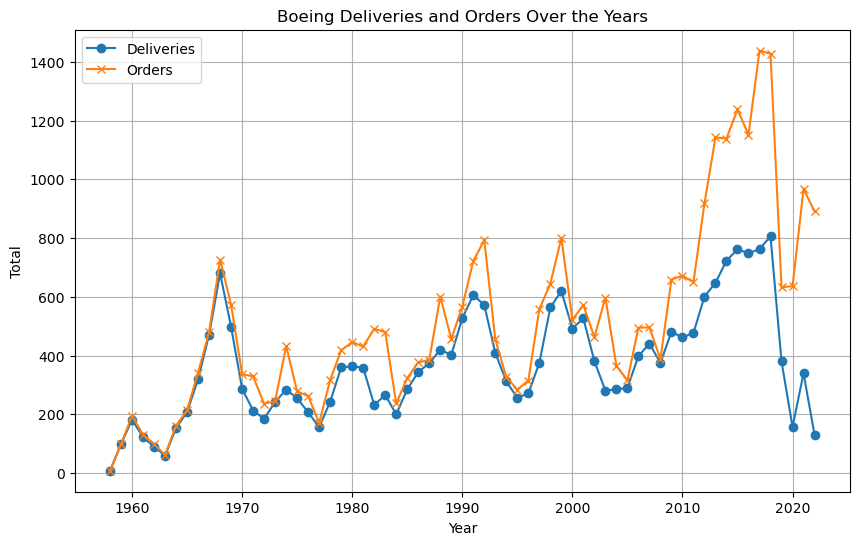

In [52]:
import matplotlib.pyplot as plt

# Plot delivery totals over the years
plt.figure(figsize=(10, 6))
plt.plot(yearly_data['Delivery Year'], yearly_data['Delivery Total'], marker='o', label='Deliveries')
plt.plot(yearly_data['Delivery Year'], yearly_data['Order Total'], marker='x', label='Orders')
plt.xlabel('Year')
plt.ylabel('Total')
plt.title('Boeing Deliveries and Orders Over the Years')
plt.legend()
plt.grid(True)
plt.show()


In [53]:
# Convert 'Order Month' from numeric or text to month names if necessary
month_mapping = {
    '1': 'Jan', '2': 'Feb', '3': 'Mar', '4': 'Apr', '5': 'May', '6': 'Jun', 
    '7': 'Jul', '8': 'Aug', '9': 'Sep', '10': 'Oct', '11': 'Nov', '12': 'Dec',
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}

data['Order Month'] = data['Order Month'].replace(month_mapping)

# Filter out invalid values in the "Order Month" column
valid_months = data[data['Order Month'].isin(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])]

# Convert "Order Month" to numeric month values
valid_months['Order Month'] = pd.to_datetime(valid_months['Order Month'], format='%b').dt.month

# Prepare features and target variable
features = valid_months[['Order Year', 'Order Month', 'Order Total']]
target = valid_months['Delivery Total']

In [54]:
##############################
from sklearn.model_selection import train_test_split

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [55]:
from sklearn.ensemble import RandomForestRegressor

# Model training
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [56]:
from sklearn.metrics import mean_squared_error

# Predictions
y_pred = model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
mse


3.2839473688514937

In [57]:
# Display the first few predictions
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
predictions.head()


,Actual,Predicted
447,1.0,0.936413
7195,0.0,2.000000
6473,8.0,6.880000
1400,1.0,1.000000
5281,0.0,5.182500


In [58]:
# Filter data for Dreamliner 787
dreamliner_data = data[data['Model Series'].str.contains('787', na=False)]

# Strip any extra whitespace from column names
dreamliner_data.columns = dreamliner_data.columns.str.strip()

# Handle missing values
dreamliner_data['Delivery Year'] = pd.to_numeric(dreamliner_data['Delivery Year'], errors='coerce')
dreamliner_data['Order Year'] = pd.to_numeric(dreamliner_data['Order Year'], errors='coerce')
dreamliner_data['Delivery Total'] = pd.to_numeric(dreamliner_data['Delivery Total'], errors='coerce')
dreamliner_data['Order Total'] = pd.to_numeric(dreamliner_data['Order Total'], errors='coerce')
dreamliner_data['Unfilled Orders'] = pd.to_numeric(dreamliner_data['Unfilled Orders'], errors='coerce')

# Fill missing numeric values using forward fill method
dreamliner_data['Delivery Year'].fillna(method='ffill', inplace=True)
dreamliner_data['Order Year'].fillna(method='ffill', inplace=True)
dreamliner_data['Delivery Total'].fillna(0, inplace=True)
dreamliner_data['Unfilled Orders'].fillna(0, inplace=True)

# Convert 'Order Month' from numeric or text to month names if necessary
dreamliner_data['Order Month'] = dreamliner_data['Order Month'].replace(month_mapping)

# Filter out invalid values in the "Order Month" column
valid_months_dreamliner = dreamliner_data[dreamliner_data['Order Month'].isin(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])]

# Convert "Order Month" to numeric month values
valid_months_dreamliner['Order Month'] = pd.to_datetime(valid_months_dreamliner['Order Month'], format='%b').dt.month

# Prepare features and target variable
features_dreamliner = valid_months_dreamliner[['Order Year', 'Order Month', 'Order Total']]
target_dreamliner = valid_months_dreamliner['Delivery Total']

# Train-test split
X_train_dreamliner, X_test_dreamliner, y_train_dreamliner, y_test_dreamliner = train_test_split(features_dreamliner, target_dreamliner, test_size=0.2, random_state=42)

# Model training
model_dreamliner = RandomForestRegressor(n_estimators=100, random_state=42)
model_dreamliner.fit(X_train_dreamliner, y_train_dreamliner)

# Predictions
y_pred_dreamliner = model_dreamliner.predict(X_test_dreamliner)

# Evaluation
mse_dreamliner = mean_squared_error(y_test_dreamliner, y_pred_dreamliner)

# Display the first few predictions
predictions_dreamliner = pd.DataFrame({'Actual': y_test_dreamliner, 'Predicted': y_pred_dreamliner})
mse_dreamliner, predictions_dreamliner.head()


C:\Users\tnime\AppData\Local\Temp\ipykernel_26424\388014831.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dreamliner_data['Delivery Year'] = pd.to_numeric(dreamliner_data['Delivery Year'], errors='coerce')
C:\Users\tnime\AppData\Local\Temp\ipykernel_26424\388014831.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dreamliner_data['Order Year'] = pd.to_numeric(dreamliner_data['Order Year'], errors='coerce')
C:\Users\tnime\AppData\Local\Temp\ipykernel_26424\388014831.py:10: SettingWithCopyWarning: 
A 

(3.1661758777619813,
       Actual  Predicted
 5256     0.0   1.020000
 8668     3.0   0.845857
 6671     2.0   1.992500
 2907     1.0   0.653634
 8728     1.0   0.985000)

In [59]:
# Create a DataFrame for future years
future_years = pd.DataFrame({
    'Order Year': [2021, 2022, 2023, 2024, 2025],
    'Order Month': [1, 1, 1, 1, 1],  # Assuming January for simplicity
    'Order Total': [100, 100, 100, 100, 100]  # Example order totals
})

# Predict future delivery totals
future_predictions = model_dreamliner.predict(future_years)

# Combine future predictions with future years DataFrame
future_df = future_years.copy()
future_df['Predicted Delivery Total'] = future_predictions

# Display the future predictions
future_df


,Order Year,Order Month,Order Total,Predicted Delivery Total
0,2021,1,100,0.36
1,2022,1,100,0.36
2,2023,1,100,0.36
3,2024,1,100,0.36
4,2025,1,100,0.36


In [60]:
# Convert 'Order Total' to numeric, coercing errors
dreamliner_data['Order Total'] = pd.to_numeric(dreamliner_data['Order Total'], errors='coerce')

# Drop rows with NaN values in 'Order Total'
dreamliner_data = dreamliner_data.dropna(subset=['Order Total'])

C:\Users\tnime\AppData\Local\Temp\ipykernel_26424\1316108689.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dreamliner_data['Order Total'] = pd.to_numeric(dreamliner_data['Order Total'], errors='coerce')


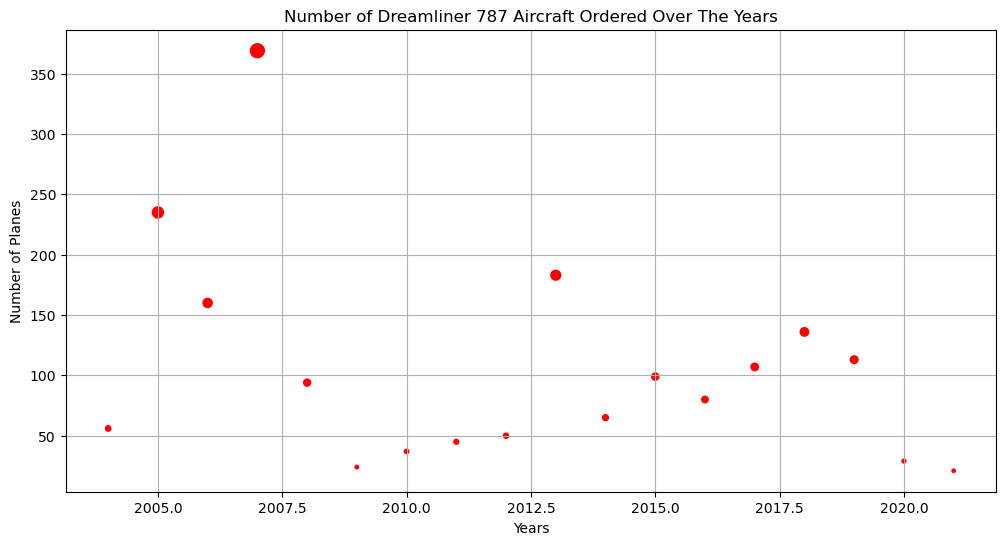

In [61]:
# Group the data by order year and sum the order totals for Dreamliner 787
dreamliner_order_totals = dreamliner_data.groupby('Order Year')['Order Total'].sum()

# Define the size of each point in the scatter plot
sizes = (dreamliner_order_totals / dreamliner_order_totals.max()) * 100  # Scale sizes for better visualization

# Plot the data
plt.figure(figsize=(12, 6))
plt.xlabel("Years")
plt.ylabel("Number of Planes")
plt.title("Number of Dreamliner 787 Aircraft Ordered Over The Years")
plt.grid(True)
plt.scatter(dreamliner_order_totals.index, dreamliner_order_totals, s=sizes, c="red")
plt.show()

In [62]:
# Ensure 'Delivery Total' is numeric
dreamliner_data['Delivery Total'] = pd.to_numeric(dreamliner_data['Delivery Total'], errors='coerce')

# Drop rows with NaN values in 'Delivery Total'
dreamliner_data = dreamliner_data.dropna(subset=['Delivery Total'])

# Recalculate Descriptive Statistics
delivery_stats_cleaned = dreamliner_data['Delivery Total'].describe()
delivery_stats_cleaned

count    517.000000
mean       1.945841
std        2.209249
min        0.000000
25%        0.000000
50%        1.000000
75%        3.000000
max       13.000000
Name: Delivery Total, dtype: float64

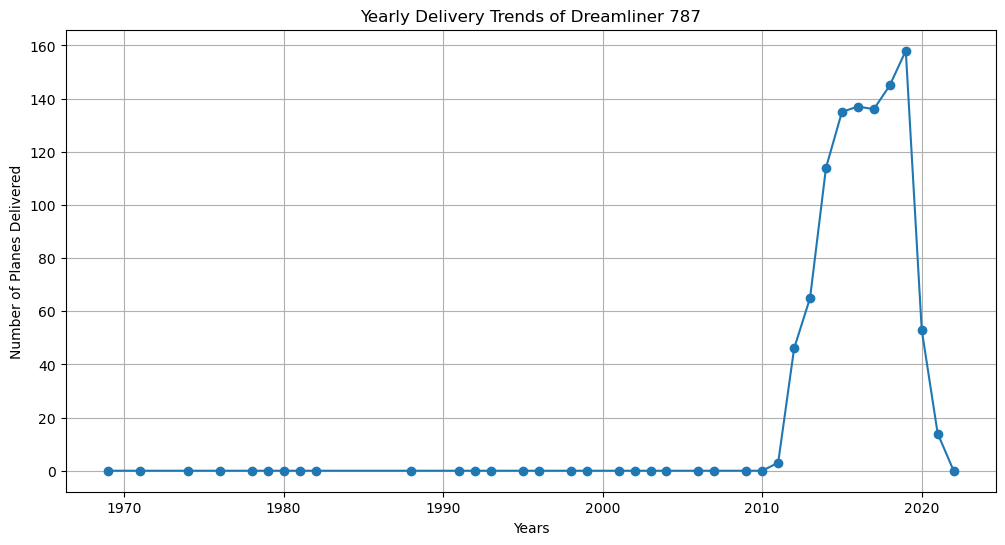

In [63]:
# Group by Delivery Year and sum the Delivery Totals
yearly_deliveries = dreamliner_data.groupby('Delivery Year')['Delivery Total'].sum()

# Plot the yearly delivery trends
plt.figure(figsize=(12, 6))
plt.plot(yearly_deliveries.index, yearly_deliveries, marker='o')
plt.xlabel("Years")
plt.ylabel("Number of Planes Delivered")
plt.title("Yearly Delivery Trends of Dreamliner 787")
plt.grid(True)
plt.show()

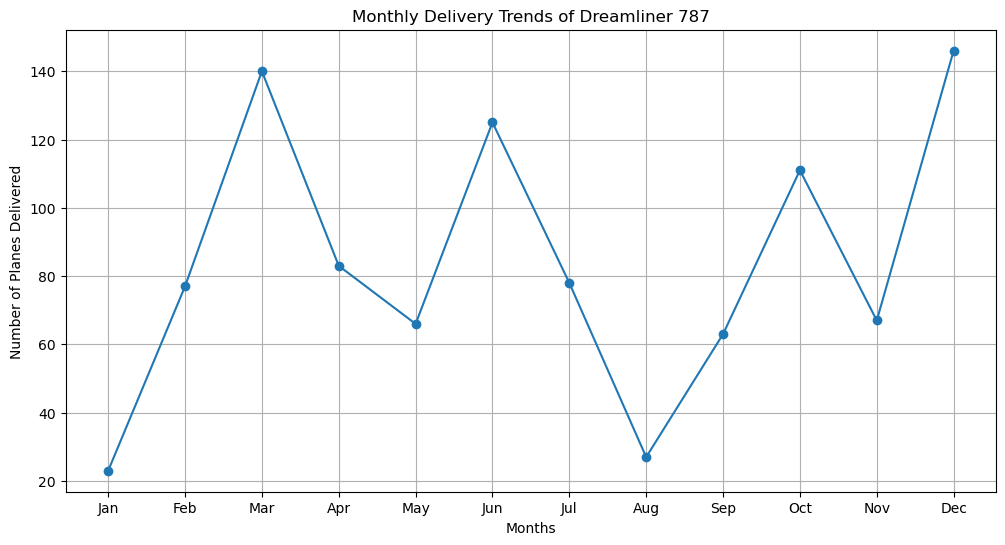

In [64]:
# Convert Order Month to numeric
dreamliner_data['Order Month'] = pd.to_datetime(dreamliner_data['Order Month'], format='%b').dt.month

# Group by Order Month and sum the Delivery Totals
monthly_deliveries = dreamliner_data.groupby('Order Month')['Delivery Total'].sum()

# Plot the monthly delivery trends
plt.figure(figsize=(12, 6))
plt.plot(monthly_deliveries.index, monthly_deliveries, marker='o')
plt.xlabel("Months")
plt.ylabel("Number of Planes Delivered")
plt.title("Monthly Delivery Trends of Dreamliner 787")
plt.grid(True)
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

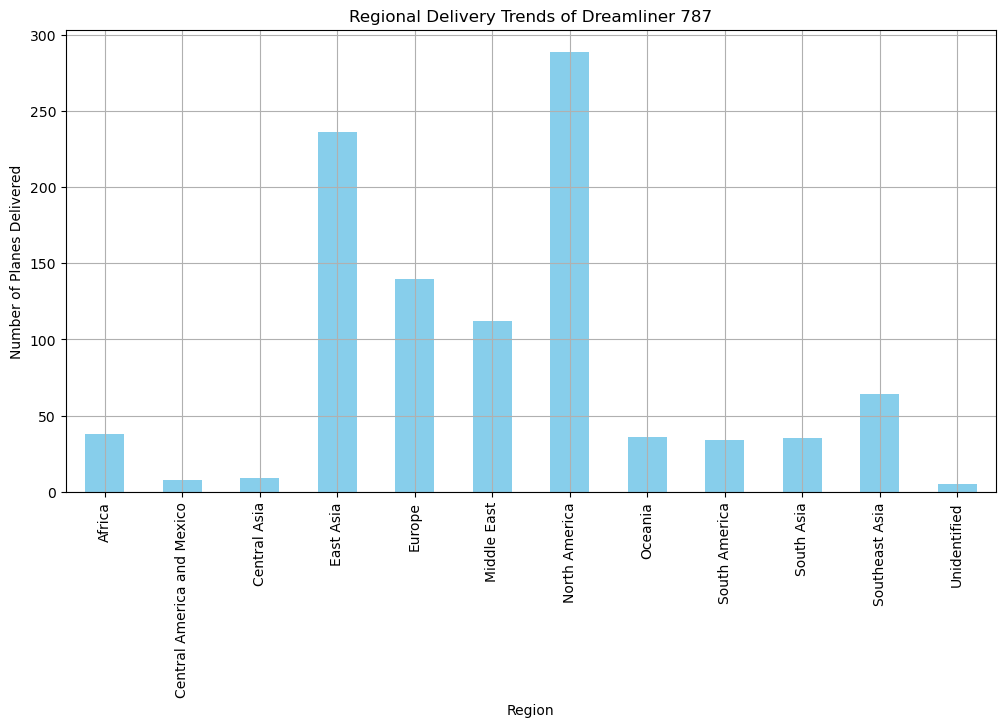

In [65]:
# Group by Region and sum the Delivery Totals
regional_deliveries = dreamliner_data.groupby('Region')['Delivery Total'].sum()

# Plot the regional delivery trends
plt.figure(figsize=(12, 6))
regional_deliveries.plot(kind='bar', color='skyblue')
plt.xlabel("Region")
plt.ylabel("Number of Planes Delivered")
plt.title("Regional Delivery Trends of Dreamliner 787")
plt.grid(True)
plt.show()

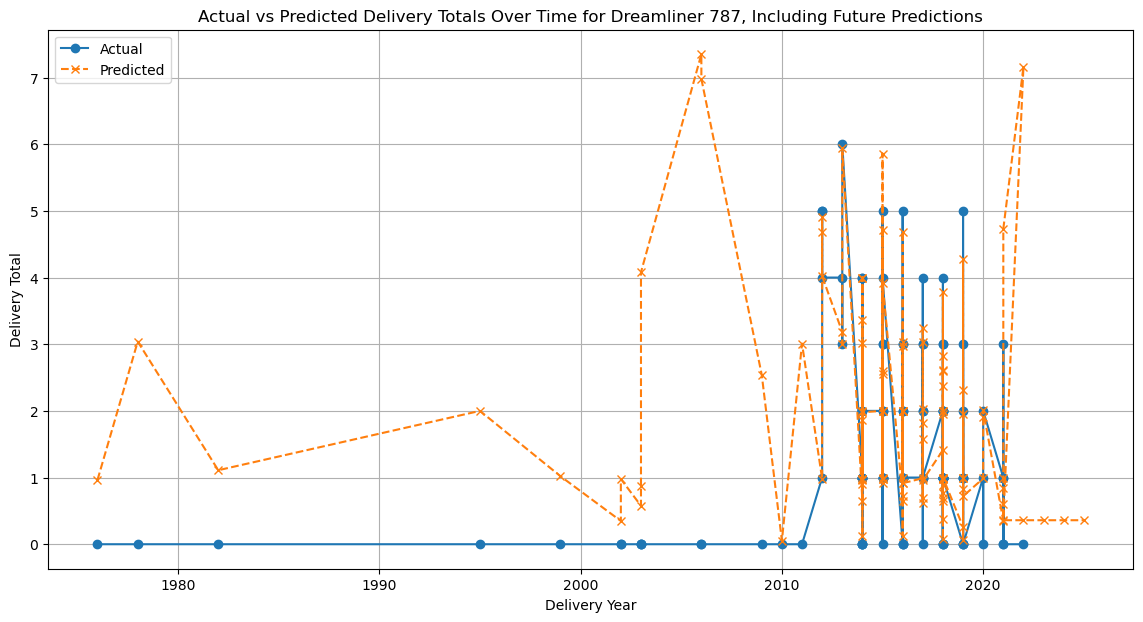

In [66]:
# Combine actual, predicted, and future predicted values into a DataFrame
comparison_df = pd.DataFrame({
    'Delivery Year': valid_months_dreamliner.loc[y_test_dreamliner.index, 'Delivery Year'],
    'Actual': y_test_dreamliner,
    'Predicted': y_pred_dreamliner
}).sort_values(by='Delivery Year')

# Append future predictions
future_comparison_df = pd.DataFrame({
    'Delivery Year': future_years['Order Year'],
    'Actual': np.nan,
    'Predicted': future_predictions
})

comparison_df = pd.concat([comparison_df, future_comparison_df])

# Plot comparison over time
plt.figure(figsize=(14, 7))
plt.plot(comparison_df['Delivery Year'], comparison_df['Actual'], marker='o', linestyle='-', label='Actual')
plt.plot(comparison_df['Delivery Year'], comparison_df['Predicted'], marker='x', linestyle='--', label='Predicted')
plt.xlabel('Delivery Year')
plt.ylabel('Delivery Total')
plt.title('Actual vs Predicted Delivery Totals Over Time for Dreamliner 787, Including Future Predictions')
plt.legend()
plt.grid(True)
plt.show()
